In [1]:
pip install plotly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 53.8 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("dataset.csv")

In [4]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
0,M,65,1,1,1,2,2,1,2,2,2,2,2,2,1,NO
1,F,55,1,2,2,1,1,2,2,2,1,1,1,2,2,NO
2,F,78,2,2,1,1,1,2,1,2,1,1,2,1,1,YES
3,M,60,2,1,1,1,2,1,2,1,1,2,1,2,2,YES
4,F,80,1,1,2,1,1,2,1,2,1,1,1,1,2,NO


In [5]:
df.shape

(3000, 16)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 3000 non-null   object
 1   AGE                    3000 non-null   int64 
 2   SMOKING                3000 non-null   int64 
 3   YELLOW_FINGERS         3000 non-null   int64 
 4   ANXIETY                3000 non-null   int64 
 5   PEER_PRESSURE          3000 non-null   int64 
 6   CHRONIC_DISEASE        3000 non-null   int64 
 7   FATIGUE                3000 non-null   int64 
 8   ALLERGY                3000 non-null   int64 
 9   WHEEZING               3000 non-null   int64 
 10  ALCOHOL_CONSUMING      3000 non-null   int64 
 11  COUGHING               3000 non-null   int64 
 12  SHORTNESS_OF_BREATH    3000 non-null   int64 
 13  SWALLOWING_DIFFICULTY  3000 non-null   int64 
 14  CHEST_PAIN             3000 non-null   int64 
 15  LUNG_CANCER          

In [7]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

In [8]:
df.describe()

,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,55.169000,1.491000,1.514000,1.494000,1.499000,1.509667,1.489667,1.506667,1.497333,1.491333,1.510667,1.488000,1.489667,1.498667
std,14.723746,0.500002,0.499887,0.500047,0.500082,0.499990,0.499977,0.500039,0.500076,0.500008,0.499970,0.499939,0.499977,0.500082
min,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,42.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,55.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000
75%,68.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,80.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [9]:
cat_cols = [col for col in df.columns if df[col].dtype == "object"]

In [10]:
num_cols = [col for col in df.columns if df[col].dtype != "object"]

In [11]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values \n")

GENDER has ['M' 'F'] values 

LUNG_CANCER has ['NO' 'YES'] values 



In [12]:
df["GENDER"] = df["GENDER"].map({ "M" : 0 , "F" : 1 })

In [13]:
df["GENDER"].unique()

array([0, 1])

In [14]:
df["LUNG_CANCER"] = df["LUNG_CANCER"].map({ "NO" : 0 , "YES" : 1})

In [15]:
df["LUNG_CANCER"].unique()

array([0, 1])

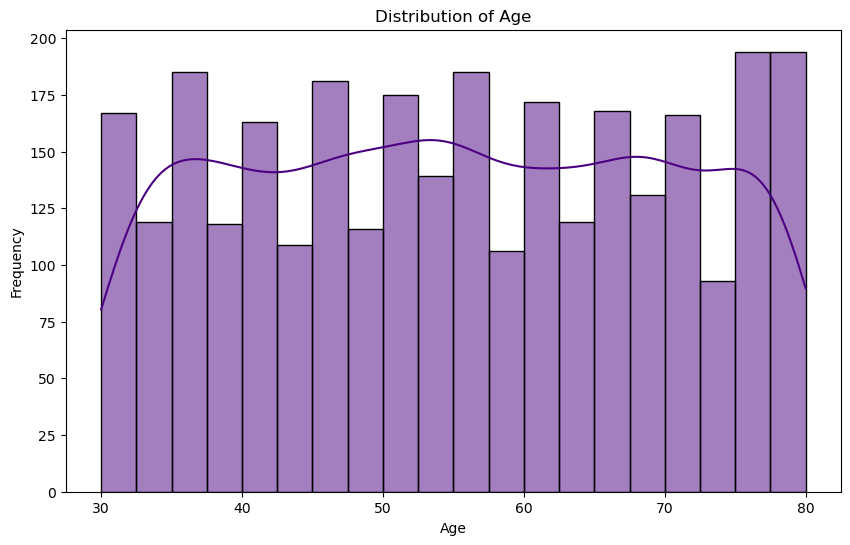

In [16]:
plt.figure(figsize = (10,6))
sns.histplot(df["AGE"], kde=True , bins=20 , color = 'indigo')
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

<AxesSubplot: xlabel='LUNG_CANCER', ylabel='count'>

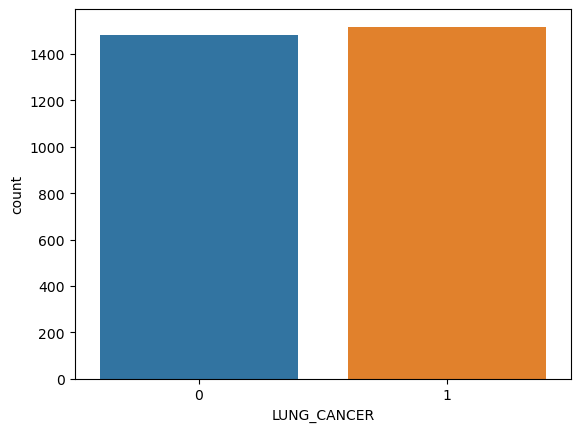

In [17]:
sns.countplot( x = "LUNG_CANCER" , data = df)

In [18]:
# more people in the survey have lung cancer in the survey

<AxesSubplot: xlabel='LUNG_CANCER', ylabel='AGE'>

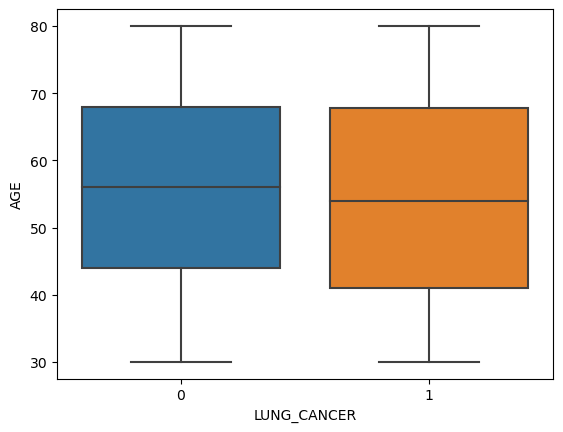

In [19]:
sns.boxplot( x = "LUNG_CANCER" , y = "AGE" , data = df)

In [20]:
# insight >>> median age of those people who dont have LUNG_CANCER is more those who dont have

In [21]:
# insight : younger people have more cacses of lung cancer

<AxesSubplot: xlabel='YELLOW_FINGERS', ylabel='count'>

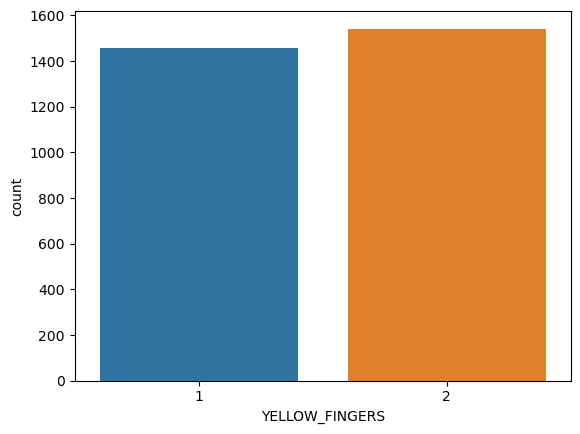

In [22]:
sns.countplot( x = "YELLOW_FINGERS" , data = df )

In [23]:
 # 1 means "yes" and 2 means "no"

In [24]:
# more people in the survey have yellow_fingers

In [25]:
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'FATIGUE', 'ALLERGY', 'WHEEZING',
       'ALCOHOL_CONSUMING', 'COUGHING', 'SHORTNESS_OF_BREATH',
       'SWALLOWING_DIFFICULTY', 'CHEST_PAIN', 'LUNG_CANCER'],
      dtype='object')

<AxesSubplot: ylabel='ANXIETY'>

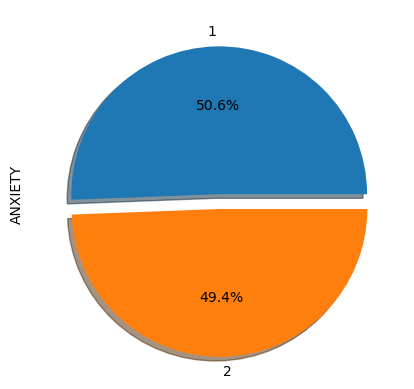

In [26]:
df.ANXIETY.value_counts().plot.pie(autopct = '%1.1f%%', explode = (0 , 0.1), shadow = True)

In [27]:
# the survey shows almost half the number of people has anxiety and half not

<AxesSubplot: xlabel='CHRONIC_DISEASE', ylabel='count'>

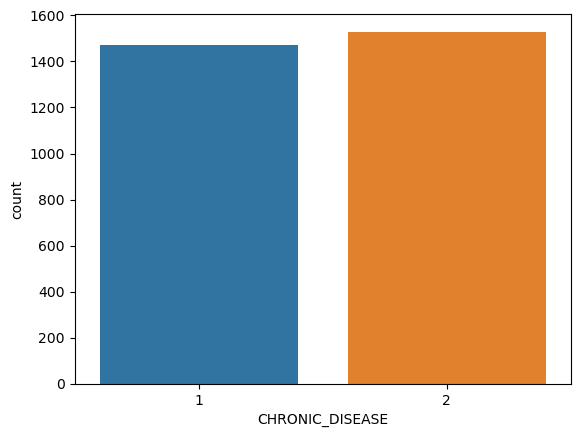

In [28]:
sns.countplot( x = "CHRONIC_DISEASE" , data = df )

In [29]:
# more people have chronic disease in the survey

<AxesSubplot: ylabel='CHEST_PAIN'>

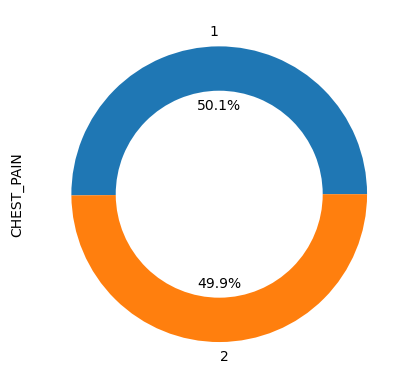

In [30]:
df.CHEST_PAIN.value_counts().plot.pie(autopct = "%1.1f%%" , wedgeprops = dict(width = 0.3))

In [31]:
# almost half the survey of people have chest_pain

<AxesSubplot: xlabel='ALLERGY', ylabel='AGE'>

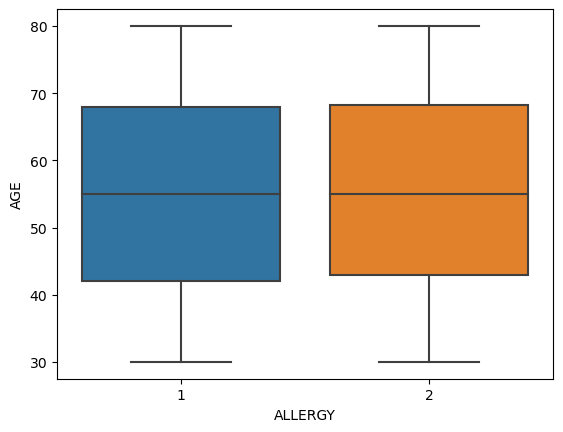

In [32]:
sns.boxplot( x = "ALLERGY" , y = "AGE" , data = df) 

In [33]:
chronic_smoking=pd.crosstab(df['SMOKING'], df["CHRONIC_DISEASE"])

In [34]:
chronic_smoking

CHRONIC_DISEASE,1,2
SMOKING,,
1,783,744
2,688,785


<AxesSubplot: xlabel='SMOKING'>

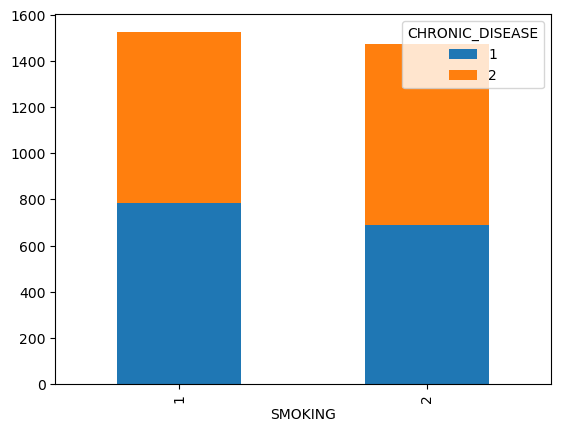

In [35]:
chronic_smoking.plot(kind = 'bar' , stacked = True)

In [36]:
corr=df.corr(numeric_only= True)

In [37]:
corr

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN,LUNG_CANCER
GENDER,1.000000,-0.010966,0.028505,-0.014412,0.023891,-0.010019,-0.008488,-0.002193,-0.013211,0.009284,0.009173,0.005534,-0.012228,0.016478,0.001309,0.016114
AGE,-0.010966,1.000000,-0.020289,0.016101,0.030051,0.003850,-0.025655,-0.002322,0.024915,-0.018212,-0.020704,-0.024909,-0.015873,-0.001688,-0.005426,-0.035712
SMOKING,0.028505,-0.020289,1.000000,-0.001497,-0.055562,-0.032041,0.045697,0.019635,0.004908,0.000571,0.003022,0.011722,-0.015772,-0.001706,-0.031387,0.014219
YELLOW_FINGERS,-0.014412,0.016101,-0.001497,1.000000,0.012342,0.011394,-0.013216,-0.010761,-0.005709,0.004151,0.027167,0.010076,-0.034018,0.018590,-0.006595,0.013003
ANXIETY,0.023891,0.030051,-0.055562,0.012342,1.000000,-0.024692,0.016903,-0.006250,-0.001174,-0.016065,-0.001542,-0.017082,-0.034967,0.033762,0.015969,-0.014525
PEER_PRESSURE,-0.010019,0.003850,-0.032041,0.011394,-0.024692,1.000000,-0.021299,-0.017378,0.011361,-0.011344,0.013967,-0.012627,-0.028723,0.015962,-0.039339,-0.024644
CHRONIC_DISEASE,-0.008488,-0.025655,0.045697,-0.013216,0.016903,-0.021299,1.000000,0.011071,-0.019597,0.022108,-0.028341,-0.003747,-0.020212,0.016406,-0.013951,-0.010235
FATIGUE,-0.002193,-0.002322,0.019635,-0.010761,-0.006250,-0.017378,0.011071,1.000000,0.004944,0.015227,0.000309,-0.001560,0.029519,0.010244,0.024617,0.002249
ALLERGY,-0.013211,0.024915,0.004908,-0.005709,-0.001174,0.011361,-0.019597,0.004944,1.000000,0.005405,-0.011772,-0.045632,-0.042363,0.012946,0.018704,0.006508
WHEEZING,0.009284,-0.018212,0.000571,0.004151,-0.016065,-0.011344,0.022108,0.015227,0.005405,1.000000,-0.004093,0.016118,-0.012132,-0.023449,-0.016015,-0.038606


<AxesSubplot: >

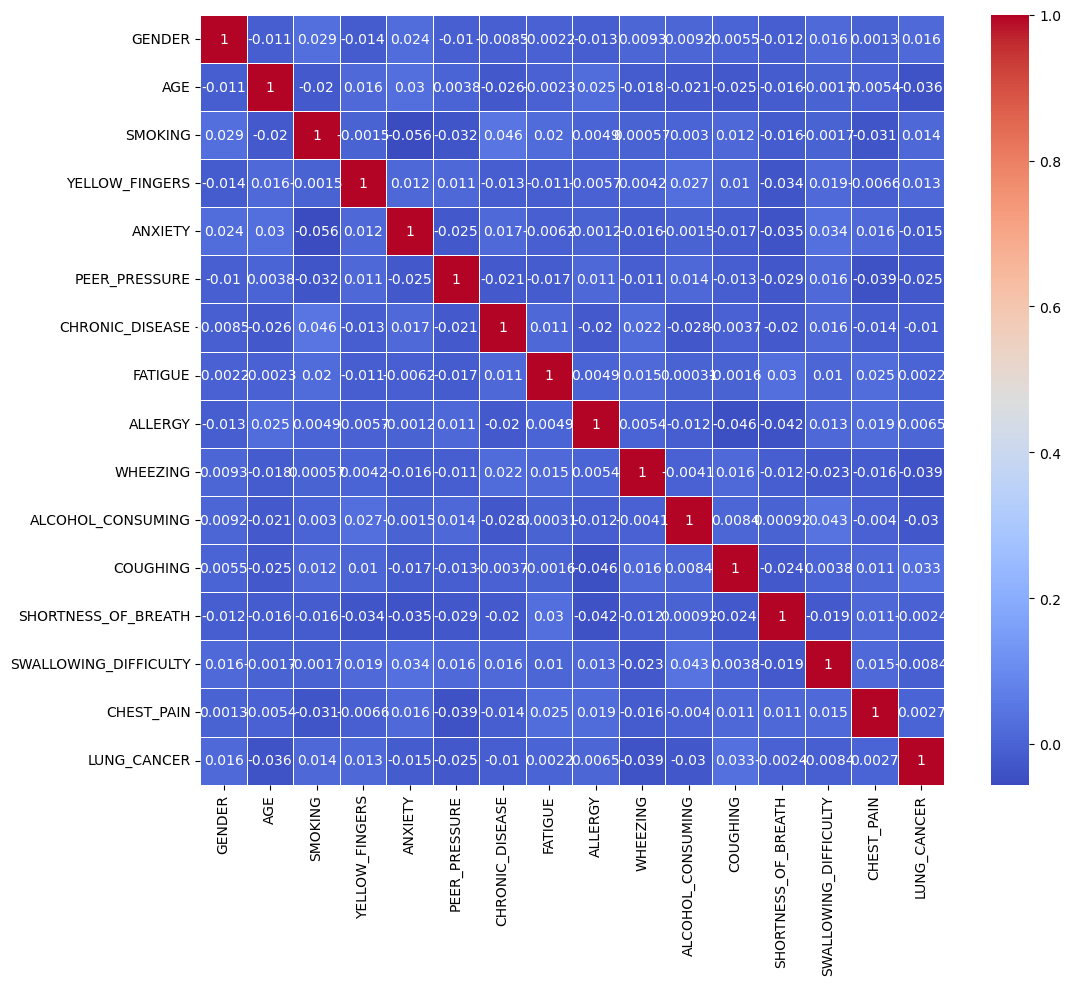

In [40]:
plt.figure(figsize = (12,10))
sns.heatmap(corr,annot = True , cmap = "coolwarm" , linewidth = .5)

In [47]:
# the realtionship between the variables are not that strong

In [44]:
max_age = max(df["AGE"]) 
min_age = min(df["AGE"])

In [45]:
max_age , min_age

(80, 30)

In [49]:
# the minimum age of survey is 30 and the max age is 80

In [1]:
# final_notebook